<div style="background-color: #f5f5f5; padding: 20px; border-radius: 10px; border: 1px solid #e0e0e0; text-align: center;">
  
  <img src="https://i.ibb.co/mLyt3rk/SUT-Logo.png" alt="SUT Logo" width="100">
  
  <h1 style="margin:10px 0 0 0; color:#333;">Sharif University of Technology</h1>
  <h2 style="margin:0; color:#555; font-weight:normal;">Faculty of Mathematical Sciences</h2>
  
  <hr style="border: 1px solid #ccc; margin-top:15px; margin-bottom:15px;">
  
  <h3 style="margin:10px 0 5px 0; color:#0056b3;">HW1: PGMs and Autoregressive Models</h3>
  <h4 style="margin:10px 0 5px 0; color:#0056b3;">Prepared by: Shaygan Adim</h4>
  <br/>
  
  <div style="font-size: 1.1em; color: #333; line-height: 1.6;">
    <strong>Course:</strong> Generative Models<br>
    <strong>Instructor:</strong> Dr. Fatemeh Seyyedsalehi<br>
    <strong>Semester:</strong> Fall 1404-1405
  </div>

</div>

<div style="background-color: #f5f5f5; border: 1px solid #f5f5f5; padding: 20px; border-radius: 10px; margin-top: 25px; margin-bottom: 25px;">
  
  <h3 style="text-align: center; margin-top: 0; color: #0056b3;">Student Information</h3>
  <p style="text-align: center; color: #555; margin-bottom: 20px; margin-top: 0;">
    Please fill in your details below.
  </p>

  <table style="width: 60%; margin-left: auto; margin-right: auto; border: none; font-size: 1.1em; color: #333;">
    <tbody>
      <tr>
        <td style="text-align: right; padding: 8px; width: 35%;"><strong>Student Name:</strong></td>
        <td style="text-align: left; padding: 8px;"><em>Your Name Here</em></td> <!-- UPDATE THIS LINE -->
      </tr>
      <tr>
        <td style="text-align: right; padding: 8px;"><strong>Student ID:</strong></td>
        <td style="text-align: left; padding: 8px;"><em>Your Student ID Here</em></td>  <!-- UPDATE THIS LINE -->
      </tr>
    </tbody>
  </table>
  
</div>

# **HW1-P2: Autoregressive Generative Models for Multivariate Time Series Generation**

In this assignment you will explore one of the state-of-the-art frameworks for generating high-fidelty time-series data. We will train four different autoregressive generative models and compare them with each other.

## Assignment Overview and Structure

### What You Will Do:
1. You'll create a synthesized time-series data of simple multi-dimensional sine waves with different characteristics.
2. You'll be asked to train these autoregressive models from scratch (using torch). In this part you might need to change and fine-tune hyperparameters several times to get a good result:
    - **RNN**
    - **LSTM**
    - **GRU** (you might not know this one. It's not that hard; it really resembles LSTM. Look it up in GPT or Google.)
    - **Transformer**

3. You'll train the models on the data and then generate a full sequence using them and compare them

---

# **Overlapping Windows Framework**

As you might know or not know, one fundumental problem with autoregressive models is that can accumulate over time indices and rise to very high values. One creative method of overcoming this issue is to teach the autoregressive generative model to generate small windows of data, conditioned on the position of the window. Then, for generating a full sequence, we can simply generate windows from all of the positions and stitch them together by averaging.

## Some Notes

* Using ChatGPT and other LLMs are allowed but you should be able to explain every line of your code completely.
* You need GPU for this assignment. You can use Colab or Kaggle for free.
* I highly recommend using the exact same structure and instructions that is provided for you in the notebook,a but minor changes will be tolerated.
* Read the whole notebook once before coding. It will give you a broad vision about what you should do on the whole.
* Your results should have the minimum quality of the results that already exists in the notebook.
* All of the parts that you should implement are marked with `#TODO`.

## Section 1: Setup and Imports

In [ ]:
import math
import random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


## Section 2: Create a Single Multivariate Sine-wave Series, Window, and Plot (10 Points)

- Create a time series data consisting of $1$ sample with Length $T$, with $D$ dimensions; each dimension is a sine with its own amplitude ($\le 1$), frequency, and phase.
- No normalization/denormalization should be applied.
- Window the series with `window_size=15` and `stride=2`, returning overlapping windows.
- Plot the series and a few example windows.

Series shape: (5000, 3)
Amplitude per dim: [0.56217808 0.96550001 0.81239576]


Building windows:   0%|          | 0/2476 [00:00<?, ?it/s]

Windows shape: (2476, 50, 3)


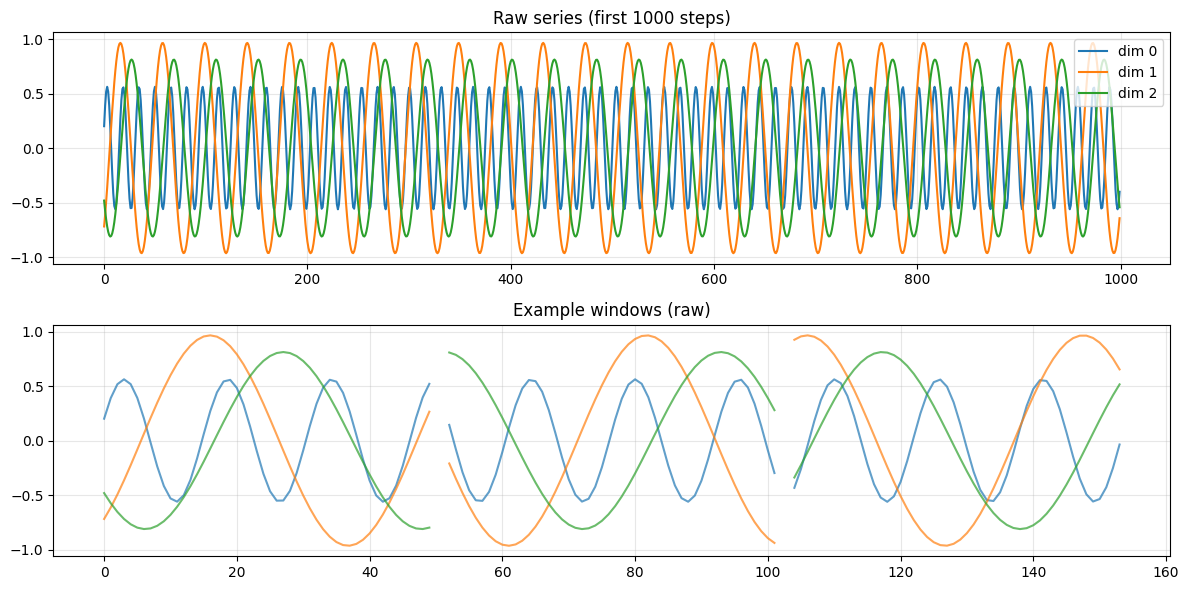

In [ ]:
# Configuration
T = 5000                # number of time steps
D = 3                   # number of dimensions
WINDOW_SIZE = 50        
STRIDE = 2              

## 1. Generate Multivariate Sine-wave Series
# Each dimension has its own amplitude (≤ 1), frequency and phase
t = np.arange(T)
series = np.zeros((T, D), dtype=np.float32)

amps = np.random.uniform(0.3, 1.0, size=D)      # amplitudes ≤ 1
freqs = np.random.uniform(0.01, 0.1, size=D)    # cycles per step
phases = np.random.uniform(0, 2*np.pi, size=D)

for d in range(D):
    series[:, d] = amps[d] * np.sin(2 * np.pi * freqs[d] * t + phases[d])

print("Series shape:", series.shape)
print("Amplitude per dim:", amps)


## 2. Window the Series
# TODO: Build overlapping windows from the single raw series
start_indices = None
windows = None

for i in tqdm(range(len(start_indices)), desc="Building windows", leave=False):
    continue

print("Windows shape:", windows.shape)


## 3. Plot Results
# Quick plots: full series (first 1000 steps) and a few sample windows
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=False)
steps_to_plot = 1000
axes[0].set_title("Series (first 1000 steps)")
for d in range(D):
    axes[0].plot(series[:steps_to_plot, d], label=f"dim {d}")
axes[0].legend(loc='upper right')
axes[0].grid(alpha=0.3)

axes[1].set_title("Example windows")
example_ids = [0, len(start_indices)//3, 2*len(start_indices)//3]
colors = ['C0','C1','C2','C3']
for idx_j, wi in enumerate(example_ids):
    w = windows[wi]
    for d in range(D):
        axes[1].plot(np.arange(WINDOW_SIZE) + idx_j*(WINDOW_SIZE+2), w[:, d], color=colors[d], alpha=0.7)
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Store Data
# Keep important objects in memory for later steps
DATA = {
    'series': series,
    'start_indices': start_indices,
    'windows': windows,
    'T': T,
     'D': D,
}

## Section 3: Dataset and Dataloaders (5 Points)

We construct a dataset from overlapping windows of the single series.
We split into train/val/test and build dataloaders.

In [ ]:
class WindowedSingleSeriesDataset(Dataset):
    def __init__(self, windows: np.ndarray, start_indices: np.ndarray):
        self.windows = windows  # shape: [N, W, D], normalized
        self.start_indices = start_indices.astype(np.int64)  # shape: [N]

    def __len__(self):
        return self.windows.shape[0]

    def __getitem__(self, idx):
        w = self.windows[idx]
        # TODO: Inputs: first W-1 steps, Targets: next W-1 steps (predict next step)
        x = None            # [W-1, D]
        y = None             # [W-1, D]
        s = self.start_indices[idx]  # scalar start index for conditioning
        return (
            torch.from_numpy(x).float(),
            torch.from_numpy(y).float(),
            torch.tensor(s, dtype=torch.long)
        )

# Train/val/test split along window index (maintaining time order)
N = DATA['windows'].shape[0]
idx_train = int(0.7 * N)
idx_val = int(0.85 * N)

train_ds = WindowedSingleSeriesDataset(DATA['windows'][:idx_train], DATA['start_indices'][:idx_train])
val_ds   = WindowedSingleSeriesDataset(DATA['windows'][idx_train:idx_val], DATA['start_indices'][idx_train:idx_val])
test_ds  = WindowedSingleSeriesDataset(DATA['windows'][idx_val:], DATA['start_indices'][idx_val:])

BATCH_SIZE = 0 # TODO: You gotta fine-tune this!
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

print(len(train_ds), len(val_ds), len(test_ds))

1733 371 372


## Section 4: Implement RNN, LSTM, GRU, and Transformer Autoregressive Models (40 Points)

- Conditioning: Each model receives the window start index (scalar) and maps it to a learned conditioning vector, concatenated/added to inputs at every time step.
- Training: Teacher forcing on windowed data (predict next step at each time), MSE loss.

In [ ]:
# Helper Modules

class StartIndexEmbedding(nn.Module):
    def __init__(self, max_len: int, emb_dim: int):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings=max_len, embedding_dim=emb_dim)
        
    def forward(self, start_idx: torch.Tensor):
        return self.emb(start_idx)
    

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, max_len: int = 6000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))  # [1, max_len, d_model]

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [ ]:
# Utility Functions

def stitch_overlapping(windows: torch.Tensor, stride: int, total_len: int):
    """
    Windows: [N_win, W, D]
    Overlap-add by averaging overlapped positions.
    Returns [T, D].
    """
    # TODO

    return None

In [ ]:
# Base Model
class BaseAR(nn.Module):
    def __init__(self, input_dim: int, cond_dim: int):
        super().__init__()
        self.input_dim = input_dim
        self.cond_dim = cond_dim

    @torch.no_grad()
    def generate_window(self, start_idx: int, steps: int, seed: torch.Tensor=None, device=None):
        raise NotImplementedError

    @torch.no_grad()
    def generate_full_sequence(self, stride: int, total_len: int, window_size: int, seed_first: torch.Tensor=None, device=None):
        """Generate overlapped windows and stitch via averaging."""
        # TODO 
        return None

# RNN Model
class RNNAR(BaseAR):
    def __init__(self, input_dim: int, hidden_dim: int, cond_dim: int, max_len: int, num_layers: int = 1):
        super().__init__(input_dim, cond_dim)
        self.sidx_emb = StartIndexEmbedding(max_len, cond_dim)
        self.rnn = nn.RNN(input_dim + cond_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.proj = nn.Linear(hidden_dim, input_dim)

    def forward(self, x: torch.Tensor, sidx: torch.Tensor):
        # TODO: x: [B, T, D], sidx: [B]
        cond = None                  # [B, C]
        cond_rep = None
        xr = None
        out_seq, _ = self.rnn(xr)
        y = None
        return y

    @torch.no_grad()
    def generate_window(self, start_idx: int, steps: int, seed: torch.Tensor=None, device=None):
        dev = device or next(self.parameters()).device
        self.eval()

        if seed is None:
            seed = torch.zeros(steps-1, self.input_dim, device=dev)

        x = seed.unsqueeze(0)  # [1, T-1, D]
        s = torch.tensor([start_idx], device=dev, dtype=torch.long)
        cond = self.sidx_emb(s)  # [1, C]
        h_state = None
        out = []

        # TODO: use seed for T-1 steps then autoregressive for last step
        for t in range(steps-1):
            continue

        # TODO: predict final next step using last output as input
        last_in = None
        xr = None
        out_seq, h_state = self.rnn(xr, h_state)
        yt = None
        out.append(yt)
        return None


# LSTM Model
class LSTMAR(BaseAR):
    def __init__(self, input_dim: int, hidden_dim: int, cond_dim: int, max_len: int, num_layers: int = 1):
        super().__init__(input_dim, cond_dim)
        self.sidx_emb = StartIndexEmbedding(max_len, cond_dim)
        self.lstm = nn.LSTM(input_dim + cond_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.proj = nn.Linear(hidden_dim, input_dim)

    def forward(self, x: torch.Tensor, sidx: torch.Tensor):
        # TODO
        cond = None
        cond_rep = None
        xr = torch.cat([x, cond_rep], dim=-1)
        out_seq, _ = self.lstm(xr)
        y = None
        return y

    @torch.no_grad()
    def generate_window(self, start_idx: int, steps: int, seed: torch.Tensor=None, device=None):
        dev = device or next(self.parameters()).device
        self.eval()

        if seed is None:
            seed = torch.zeros(steps-1, self.input_dim, device=dev)

        # TODO
        x = seed.unsqueeze(0)
        s = torch.tensor([start_idx], device=dev, dtype=torch.long)
        cond = None
        h_state = None
        out = []

        for t in range(steps-1):
            continue

        last_in = None
        xr = None
        out_seq, h_state = self.lstm(xr, h_state)
        yt = None
        out.append(yt)
        return None


# GRU Model
class GRUAR(BaseAR):
    def __init__(self, input_dim: int, hidden_dim: int, cond_dim: int, max_len: int, num_layers: int = 1):
        super().__init__(input_dim, cond_dim)
        self.sidx_emb = StartIndexEmbedding(max_len, cond_dim)
        self.gru = nn.GRU(input_dim + cond_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.proj = nn.Linear(hidden_dim, input_dim)

    def forward(self, x: torch.Tensor, sidx: torch.Tensor):
        # TODO 
        cond = None
        cond_rep = None
        xr = None
        out_seq, _ = self.gru(xr)
        y = None
        return y

    @torch.no_grad()
    def generate_window(self, start_idx: int, steps: int, seed: torch.Tensor=None, device=None):
        dev = device or next(self.parameters()).device
        self.eval()

        if seed is None:
            seed = torch.zeros(steps-1, self.input_dim, device=dev)

        # TODO
        x = None
        s = None
        cond = None
        h_state = None
        out = []

        for t in range(steps-1):
            continue

        last_in = None
        xr = None
        out_seq, h_state = self.gru(xr, h_state)
        yt = None
        out.append(yt)
        return None


# Transformer Model
class TransformerAR(BaseAR):
    def __init__(self, input_dim: int, d_model: int, nhead: int, num_layers: int, cond_dim: int, max_len: int, dim_feedforward: int=128):
        super().__init__(input_dim, cond_dim)
        self.sidx_emb = StartIndexEmbedding(max_len, cond_dim)
        self.inp = nn.Linear(input_dim + cond_dim, d_model)
        self.pos = PositionalEncoding(d_model, max_len=2048)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, batch_first=True, activation='gelu')
        self.enc = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.proj = nn.Linear(d_model, input_dim)

    def forward(self, x: torch.Tensor, sidx: torch.Tensor):
        # TODO
        cond = None
        cond_rep = None
        xr = None
        h = self.inp(xr)
        h = self.pos(h)

        # causal mask for auto-regressive training
        Tt = None
        mask = None
        h = None
        y = None
        return y

    @torch.no_grad()
    def generate_window(self, start_idx: int, steps: int, seed: torch.Tensor=None, device=None):
        dev = device or next(self.parameters()).device
        self.eval()

        if seed is None:
            seed = torch.zeros(steps-1, self.input_dim, device=dev)
            
        # TODO
        x_seq = None  # [W-1, D]

        # roll one step at a time autoregressively
        while x_seq.size(0) < steps:
            continue

        # take exactly steps outputs
        return None

## Section 5: Instantiate Models with Roughly Equal Parameter Counts

We choose hidden sizes so total parameters per model are similar. 
In this part you should fine-tune all of the hyperparameters to achieve a good result.

In [ ]:
def count_parameters(model: nn.Module):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# TODO: search for suitable hyperparameters (replace 0 values)

MAX_LEN = DATA['T']  # for start-index embedding
COND_DIM = 0

# Roughly match parameter counts by tuning hidden sizes and layers
RNN_H = 0; RNN_L = 0
LSTM_H = 0; LSTM_L = 0
GRU_H = 0; GRU_L = 0
T_D_MODEL = 0; T_NHEAD = 0; T_LAYERS = 0; T_FF = 0

rnn_model = RNNAR(input_dim=D, hidden_dim=RNN_H, cond_dim=COND_DIM, max_len=MAX_LEN, num_layers=RNN_L).to(device)
lstm_model = LSTMAR(input_dim=D, hidden_dim=LSTM_H, cond_dim=COND_DIM, max_len=MAX_LEN, num_layers=LSTM_L).to(device)
gru_model = GRUAR(input_dim=D, hidden_dim=GRU_H, cond_dim=COND_DIM, max_len=MAX_LEN, num_layers=GRU_L).to(device)
tr_model = TransformerAR(input_dim=D, d_model=T_D_MODEL, nhead=T_NHEAD, num_layers=T_LAYERS, cond_dim=COND_DIM, max_len=MAX_LEN, dim_feedforward=T_FF).to(device)

for name, m in [("RNN", rnn_model), ("LSTM", lstm_model), ("GRU", gru_model), ("Transformer", tr_model)]:
    print(f"{name} params: {count_parameters(m):,}")

## Section 6: Training Loops (15 Points)

We train using MSE loss to predict next-step over each window.

In [ ]:
def train_one_model(model: nn.Module, train_loader, val_loader, epochs=8, lr=1e-3):
    model = model.to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    train_losses = []
    val_losses = []

    # TODO
    for ep in range(epochs):
        # train
        model.train()
        running = 0.0
        pbar = tqdm(train_loader, desc=f"Train {model.__class__.__name__} ep {ep+1}/{epochs}")

        for x, y, s in pbar:
            continue

        train_loss = running / len(train_loader.dataset)
        train_losses.append(train_loss)

        # validation
        model.eval()
        val_running = 0.0

        with torch.no_grad():
            for x, y, s in tqdm(val_loader, desc=f"Val {model.__class__.__name__} ep {ep+1}/{epochs}", leave=False):
                continue

        val_loss = val_running / len(val_loader.dataset)
        val_losses.append(val_loss)
        print(f"Epoch {ep+1}: train {train_loss:.5f} | val {val_loss:.5f}")

    return train_losses, val_losses

EPOCHS = 50
LR = 1e-4
all_hist = {}
final_val_losses = {}

for name, m in [("RNN", rnn_model), ("LSTM", lstm_model), ("GRU", gru_model), ("Transformer", tr_model)]:
    print(f"\n===> Training {name}")
    tr, vl = train_one_model(m, train_loader, val_loader, epochs=EPOCHS, lr=LR)
    all_hist[name] = {'train': tr, 'val': vl}
    final_val_losses[name] = vl[-1]
    print(f"Final validation loss for {name}: {vl[-1]:.5f}")

print("\nFinal validation losses:")
for k, v in final_val_losses.items():
    print(f"{k}: {v:.5f}")


===> Training RNN


Train RNNAR ep 1/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 1/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1: train 0.26165 | val 0.15637


Train RNNAR ep 2/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 2/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2: train 0.10256 | val 0.08889


Train RNNAR ep 3/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 3/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3: train 0.07706 | val 0.07472


Train RNNAR ep 4/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 4/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 4: train 0.06533 | val 0.05791


Train RNNAR ep 5/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 5/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 5: train 0.03886 | val 0.02973


Train RNNAR ep 6/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 6/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 6: train 0.02446 | val 0.02251


Train RNNAR ep 7/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 7/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 7: train 0.01970 | val 0.01879


Train RNNAR ep 8/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 8/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 8: train 0.01691 | val 0.01649


Train RNNAR ep 9/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 9/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 9: train 0.01505 | val 0.01492


Train RNNAR ep 10/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 10/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 10: train 0.01374 | val 0.01371


Train RNNAR ep 11/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 11/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 11: train 0.01266 | val 0.01271


Train RNNAR ep 12/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 12/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 12: train 0.01167 | val 0.01172


Train RNNAR ep 13/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 13/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 13: train 0.01077 | val 0.01082


Train RNNAR ep 14/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 14/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 14: train 0.00991 | val 0.00994


Train RNNAR ep 15/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 15/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 15: train 0.00911 | val 0.00912


Train RNNAR ep 16/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 16/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 16: train 0.00833 | val 0.00832


Train RNNAR ep 17/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 17/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 17: train 0.00759 | val 0.00760


Train RNNAR ep 18/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 18/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 18: train 0.00690 | val 0.00686


Train RNNAR ep 19/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 19/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 19: train 0.00625 | val 0.00620


Train RNNAR ep 20/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 20/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 20: train 0.00561 | val 0.00557


Train RNNAR ep 21/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 21/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 21: train 0.00505 | val 0.00500


Train RNNAR ep 22/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 22/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 22: train 0.00453 | val 0.00449


Train RNNAR ep 23/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 23/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 23: train 0.00403 | val 0.00399


Train RNNAR ep 24/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 24/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 24: train 0.00359 | val 0.00355


Train RNNAR ep 25/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 25/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 25: train 0.00321 | val 0.00316


Train RNNAR ep 26/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 26/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 26: train 0.00285 | val 0.00282


Train RNNAR ep 27/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 27/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 27: train 0.00254 | val 0.00253


Train RNNAR ep 28/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 28/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 28: train 0.00226 | val 0.00223


Train RNNAR ep 29/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 29/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 29: train 0.00201 | val 0.00199


Train RNNAR ep 30/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 30/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 30: train 0.00179 | val 0.00178


Train RNNAR ep 31/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 31/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 31: train 0.00159 | val 0.00159


Train RNNAR ep 32/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 32/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 32: train 0.00143 | val 0.00143


Train RNNAR ep 33/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 33/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 33: train 0.00128 | val 0.00130


Train RNNAR ep 34/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 34/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 34: train 0.00116 | val 0.00117


Train RNNAR ep 35/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 35/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 35: train 0.00106 | val 0.00108


Train RNNAR ep 36/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 36/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 36: train 0.00097 | val 0.00100


Train RNNAR ep 37/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 37/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 37: train 0.00090 | val 0.00091


Train RNNAR ep 38/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 38/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 38: train 0.00082 | val 0.00084


Train RNNAR ep 39/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 39/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 39: train 0.00076 | val 0.00080


Train RNNAR ep 40/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 40/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 40: train 0.00072 | val 0.00075


Train RNNAR ep 41/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 41/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 41: train 0.00069 | val 0.00072


Train RNNAR ep 42/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 42/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 42: train 0.00065 | val 0.00070


Train RNNAR ep 43/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 43/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 43: train 0.00063 | val 0.00066


Train RNNAR ep 44/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 44/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 44: train 0.00061 | val 0.00065


Train RNNAR ep 45/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 45/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 45: train 0.00060 | val 0.00066


Train RNNAR ep 46/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 46/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 46: train 0.00059 | val 0.00063


Train RNNAR ep 47/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 47/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 47: train 0.00057 | val 0.00063


Train RNNAR ep 48/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 48/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 48: train 0.00057 | val 0.00061


Train RNNAR ep 49/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 49/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 49: train 0.00056 | val 0.00060


Train RNNAR ep 50/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val RNNAR ep 50/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 50: train 0.00055 | val 0.00059
Final validation loss for RNN: 0.00059

===> Training LSTM


Train LSTMAR ep 1/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 1/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1: train 0.30573 | val 0.31814


Train LSTMAR ep 2/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 2/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2: train 0.30542 | val 0.31793


Train LSTMAR ep 3/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 3/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3: train 0.30506 | val 0.31639


Train LSTMAR ep 4/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 4/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 4: train 0.28858 | val 0.25089


Train LSTMAR ep 5/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 5/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 5: train 0.20352 | val 0.18284


Train LSTMAR ep 6/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 6/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 6: train 0.15335 | val 0.13110


Train LSTMAR ep 7/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 7/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 7: train 0.11891 | val 0.11740


Train LSTMAR ep 8/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 8/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 8: train 0.10953 | val 0.11002


Train LSTMAR ep 9/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 9/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 9: train 0.10391 | val 0.10510


Train LSTMAR ep 10/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 10/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 10: train 0.09931 | val 0.10071


Train LSTMAR ep 11/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 11/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 11: train 0.09512 | val 0.09627


Train LSTMAR ep 12/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 12/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 12: train 0.09102 | val 0.09233


Train LSTMAR ep 13/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 13/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 13: train 0.08737 | val 0.08887


Train LSTMAR ep 14/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 14/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 14: train 0.08411 | val 0.08568


Train LSTMAR ep 15/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 15/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 15: train 0.08117 | val 0.08282


Train LSTMAR ep 16/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 16/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 16: train 0.07845 | val 0.08020


Train LSTMAR ep 17/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 17/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 17: train 0.07598 | val 0.07785


Train LSTMAR ep 18/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 18/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 18: train 0.07391 | val 0.07583


Train LSTMAR ep 19/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 19/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 19: train 0.07210 | val 0.07412


Train LSTMAR ep 20/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 20/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 20: train 0.07051 | val 0.07265


Train LSTMAR ep 21/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 21/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 21: train 0.06915 | val 0.07133


Train LSTMAR ep 22/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 22/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 22: train 0.06798 | val 0.07017


Train LSTMAR ep 23/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 23/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 23: train 0.06692 | val 0.06913


Train LSTMAR ep 24/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 24/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 24: train 0.06596 | val 0.06820


Train LSTMAR ep 25/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 25/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 25: train 0.06509 | val 0.06737


Train LSTMAR ep 26/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 26/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 26: train 0.06433 | val 0.06659


Train LSTMAR ep 27/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 27/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 27: train 0.06359 | val 0.06589


Train LSTMAR ep 28/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 28/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 28: train 0.06294 | val 0.06524


Train LSTMAR ep 29/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 29/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 29: train 0.06235 | val 0.06463


Train LSTMAR ep 30/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 30/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 30: train 0.06177 | val 0.06409


Train LSTMAR ep 31/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 31/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 31: train 0.06126 | val 0.06357


Train LSTMAR ep 32/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 32/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 32: train 0.06077 | val 0.06309


Train LSTMAR ep 33/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 33/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 33: train 0.06033 | val 0.06263


Train LSTMAR ep 34/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 34/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 34: train 0.05990 | val 0.06221


Train LSTMAR ep 35/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 35/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 35: train 0.05950 | val 0.06181


Train LSTMAR ep 36/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 36/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 36: train 0.05914 | val 0.06143


Train LSTMAR ep 37/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 37/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 37: train 0.05875 | val 0.06106


Train LSTMAR ep 38/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 38/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 38: train 0.05842 | val 0.06070


Train LSTMAR ep 39/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 39/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 39: train 0.05810 | val 0.06037


Train LSTMAR ep 40/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 40/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 40: train 0.05774 | val 0.06004


Train LSTMAR ep 41/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 41/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 41: train 0.05745 | val 0.05972


Train LSTMAR ep 42/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 42/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 42: train 0.05714 | val 0.05940


Train LSTMAR ep 43/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 43/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 43: train 0.05686 | val 0.05913


Train LSTMAR ep 44/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 44/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 44: train 0.05659 | val 0.05886


Train LSTMAR ep 45/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 45/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 45: train 0.05635 | val 0.05862


Train LSTMAR ep 46/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 46/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 46: train 0.05612 | val 0.05838


Train LSTMAR ep 47/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 47/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 47: train 0.05591 | val 0.05817


Train LSTMAR ep 48/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 48/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 48: train 0.05571 | val 0.05799


Train LSTMAR ep 49/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 49/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 49: train 0.05553 | val 0.05782


Train LSTMAR ep 50/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val LSTMAR ep 50/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 50: train 0.05538 | val 0.05767
Final validation loss for LSTM: 0.05767

===> Training GRU


Train GRUAR ep 1/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 1/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1: train 0.29932 | val 0.29346


Train GRUAR ep 2/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 2/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2: train 0.21172 | val 0.13420


Train GRUAR ep 3/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 3/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3: train 0.11262 | val 0.11222


Train GRUAR ep 4/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 4/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 4: train 0.09963 | val 0.09879


Train GRUAR ep 5/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 5/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 5: train 0.09343 | val 0.09480


Train GRUAR ep 6/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 6/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 6: train 0.08956 | val 0.09154


Train GRUAR ep 7/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 7/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 7: train 0.08634 | val 0.08825


Train GRUAR ep 8/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 8/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 8: train 0.08330 | val 0.08521


Train GRUAR ep 9/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 9/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 9: train 0.08043 | val 0.08215


Train GRUAR ep 10/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 10/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 10: train 0.07738 | val 0.07894


Train GRUAR ep 11/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 11/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 11: train 0.07398 | val 0.07494


Train GRUAR ep 12/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 12/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 12: train 0.06922 | val 0.06788


Train GRUAR ep 13/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 13/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 13: train 0.05705 | val 0.04449


Train GRUAR ep 14/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 14/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 14: train 0.03531 | val 0.03262


Train GRUAR ep 15/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 15/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 15: train 0.02930 | val 0.02824


Train GRUAR ep 16/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 16/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 16: train 0.02632 | val 0.02654


Train GRUAR ep 17/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 17/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 17: train 0.02495 | val 0.02557


Train GRUAR ep 18/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 18/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 18: train 0.02411 | val 0.02460


Train GRUAR ep 19/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 19/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 19: train 0.02318 | val 0.02386


Train GRUAR ep 20/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 20/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 20: train 0.02249 | val 0.02326


Train GRUAR ep 21/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 21/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 21: train 0.02192 | val 0.02263


Train GRUAR ep 22/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 22/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 22: train 0.02125 | val 0.02185


Train GRUAR ep 23/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 23/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 23: train 0.02061 | val 0.02124


Train GRUAR ep 24/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 24/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 24: train 0.02012 | val 0.02072


Train GRUAR ep 25/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 25/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 25: train 0.01960 | val 0.02013


Train GRUAR ep 26/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 26/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 26: train 0.01899 | val 0.01957


Train GRUAR ep 27/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 27/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 27: train 0.01847 | val 0.01905


Train GRUAR ep 28/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 28/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 28: train 0.01799 | val 0.01873


Train GRUAR ep 29/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 29/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 29: train 0.01756 | val 0.01808


Train GRUAR ep 30/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 30/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 30: train 0.01707 | val 0.01766


Train GRUAR ep 31/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 31/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 31: train 0.01663 | val 0.01723


Train GRUAR ep 32/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 32/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 32: train 0.01623 | val 0.01678


Train GRUAR ep 33/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 33/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 33: train 0.01581 | val 0.01636


Train GRUAR ep 34/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 34/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 34: train 0.01550 | val 0.01611


Train GRUAR ep 35/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 35/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 35: train 0.01509 | val 0.01557


Train GRUAR ep 36/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 36/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 36: train 0.01474 | val 0.01522


Train GRUAR ep 37/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 37/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 37: train 0.01440 | val 0.01488


Train GRUAR ep 38/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 38/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 38: train 0.01417 | val 0.01451


Train GRUAR ep 39/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 39/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 39: train 0.01372 | val 0.01425


Train GRUAR ep 40/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 40/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 40: train 0.01338 | val 0.01387


Train GRUAR ep 41/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 41/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 41: train 0.01308 | val 0.01353


Train GRUAR ep 42/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 42/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 42: train 0.01277 | val 0.01327


Train GRUAR ep 43/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 43/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 43: train 0.01255 | val 0.01296


Train GRUAR ep 44/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 44/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 44: train 0.01230 | val 0.01283


Train GRUAR ep 45/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 45/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 45: train 0.01208 | val 0.01241


Train GRUAR ep 46/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 46/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 46: train 0.01181 | val 0.01216


Train GRUAR ep 47/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 47/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 47: train 0.01155 | val 0.01223


Train GRUAR ep 48/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 48/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 48: train 0.01131 | val 0.01177


Train GRUAR ep 49/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 49/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 49: train 0.01106 | val 0.01140


Train GRUAR ep 50/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val GRUAR ep 50/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 50: train 0.01077 | val 0.01123
Final validation loss for GRU: 0.01123

===> Training Transformer


Train TransformerAR ep 1/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 1/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1: train 0.36151 | val 0.30118


Train TransformerAR ep 2/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 2/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 2: train 0.28742 | val 0.26535


Train TransformerAR ep 3/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 3/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 3: train 0.23421 | val 0.17254


Train TransformerAR ep 4/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 4/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 4: train 0.13411 | val 0.09240


Train TransformerAR ep 5/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 5/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 5: train 0.08898 | val 0.05921


Train TransformerAR ep 6/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 6/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 6: train 0.06646 | val 0.04534


Train TransformerAR ep 7/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 7/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 7: train 0.05325 | val 0.03192


Train TransformerAR ep 8/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 8/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 8: train 0.04148 | val 0.01880


Train TransformerAR ep 9/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 9/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 9: train 0.03253 | val 0.01275


Train TransformerAR ep 10/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 10/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 10: train 0.02785 | val 0.01046


Train TransformerAR ep 11/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 11/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 11: train 0.02449 | val 0.00817


Train TransformerAR ep 12/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 12/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 12: train 0.02185 | val 0.00658


Train TransformerAR ep 13/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 13/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 13: train 0.01964 | val 0.00569


Train TransformerAR ep 14/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 14/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 14: train 0.01795 | val 0.00498


Train TransformerAR ep 15/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 15/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 15: train 0.01669 | val 0.00416


Train TransformerAR ep 16/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 16/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 16: train 0.01554 | val 0.00400


Train TransformerAR ep 17/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 17/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 17: train 0.01462 | val 0.00329


Train TransformerAR ep 18/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 18/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 18: train 0.01368 | val 0.00317


Train TransformerAR ep 19/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 19/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 19: train 0.01309 | val 0.00290


Train TransformerAR ep 20/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 20/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 20: train 0.01242 | val 0.00280


Train TransformerAR ep 21/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 21/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 21: train 0.01194 | val 0.00248


Train TransformerAR ep 22/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 22/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 22: train 0.01128 | val 0.00235


Train TransformerAR ep 23/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 23/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 23: train 0.01087 | val 0.00219


Train TransformerAR ep 24/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 24/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 24: train 0.01041 | val 0.00209


Train TransformerAR ep 25/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 25/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 25: train 0.01004 | val 0.00198


Train TransformerAR ep 26/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 26/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 26: train 0.00960 | val 0.00190


Train TransformerAR ep 27/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 27/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 27: train 0.00927 | val 0.00189


Train TransformerAR ep 28/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 28/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 28: train 0.00903 | val 0.00175


Train TransformerAR ep 29/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 29/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 29: train 0.00870 | val 0.00166


Train TransformerAR ep 30/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 30/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 30: train 0.00845 | val 0.00165


Train TransformerAR ep 31/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 31/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 31: train 0.00820 | val 0.00151


Train TransformerAR ep 32/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 32/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 32: train 0.00798 | val 0.00149


Train TransformerAR ep 33/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 33/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 33: train 0.00767 | val 0.00152


Train TransformerAR ep 34/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 34/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 34: train 0.00749 | val 0.00153


Train TransformerAR ep 35/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 35/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 35: train 0.00735 | val 0.00136


Train TransformerAR ep 36/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 36/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 36: train 0.00715 | val 0.00132


Train TransformerAR ep 37/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 37/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 37: train 0.00696 | val 0.00137


Train TransformerAR ep 38/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 38/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 38: train 0.00675 | val 0.00133


Train TransformerAR ep 39/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 39/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 39: train 0.00661 | val 0.00121


Train TransformerAR ep 40/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 40/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 40: train 0.00648 | val 0.00126


Train TransformerAR ep 41/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 41/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 41: train 0.00634 | val 0.00126


Train TransformerAR ep 42/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 42/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 42: train 0.00617 | val 0.00120


Train TransformerAR ep 43/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 43/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 43: train 0.00606 | val 0.00116


Train TransformerAR ep 44/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 44/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 44: train 0.00598 | val 0.00124


Train TransformerAR ep 45/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 45/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 45: train 0.00580 | val 0.00108


Train TransformerAR ep 46/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 46/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 46: train 0.00574 | val 0.00117


Train TransformerAR ep 47/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 47/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 47: train 0.00561 | val 0.00110


Train TransformerAR ep 48/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 48/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 48: train 0.00551 | val 0.00103


Train TransformerAR ep 49/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 49/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 49: train 0.00538 | val 0.00105


Train TransformerAR ep 50/50:   0%|          | 0/13 [00:00<?, ?it/s]

Val TransformerAR ep 50/50:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 50: train 0.00529 | val 0.00105
Final validation loss for Transformer: 0.00105

Final validation losses:
RNN: 0.00059
LSTM: 0.05767
GRU: 0.01123
Transformer: 0.00105


## Section 7: Plot Training Curves

We plot per-epoch training and validation loss for all four models.

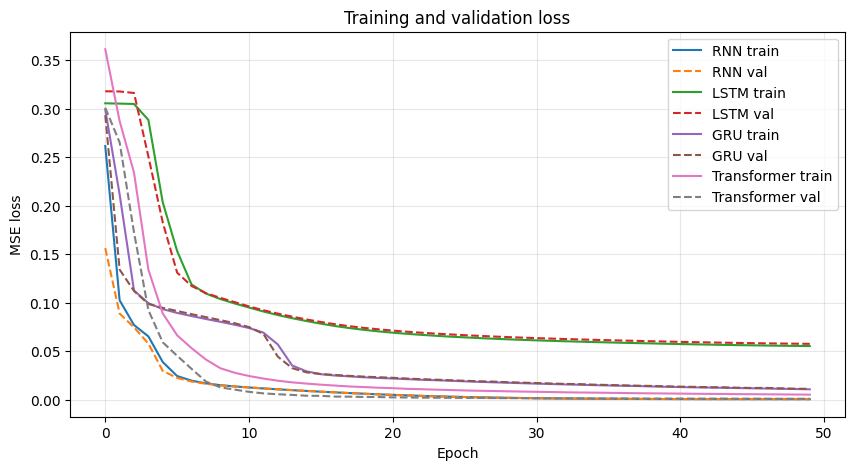

In [ ]:
plt.figure(figsize=(10,5))

for name in all_hist:
    plt.plot(all_hist[name]['train'], label=f"{name} train")
    plt.plot(all_hist[name]['val'], '--', label=f"{name} val")

plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Training and validation loss')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Section 8: Generate Full Sequences and Plot Against Ground Truth (30 Points)

We generate using overlapped windows stitched by averaging for each model. For visualization, we:
- Show each model separately.
- Within each model, show each dimension on its own subplot.
- Indicate train/val/test regions on the time axis.

Most of this section's points are awarded for the quality of the outputs! Try to get a good result!
Don't forget that these are generative models! The whole point of them is to "resemble" but not be "identical" to their training data!

RNNAR full generation:   0%|          | 0/2476 [00:00<?, ?it/s]

LSTMAR full generation:   0%|          | 0/2476 [00:00<?, ?it/s]

GRUAR full generation:   0%|          | 0/2476 [00:00<?, ?it/s]

TransformerAR full generation:   0%|          | 0/2476 [00:00<?, ?it/s]

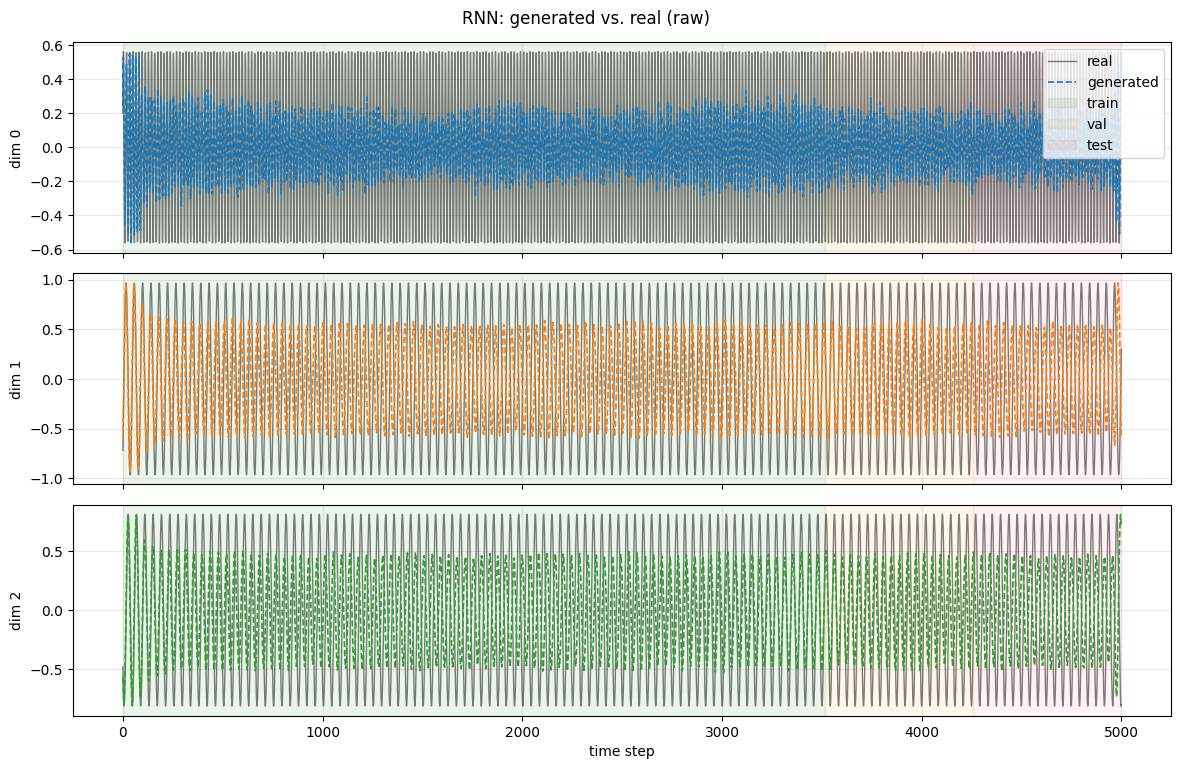

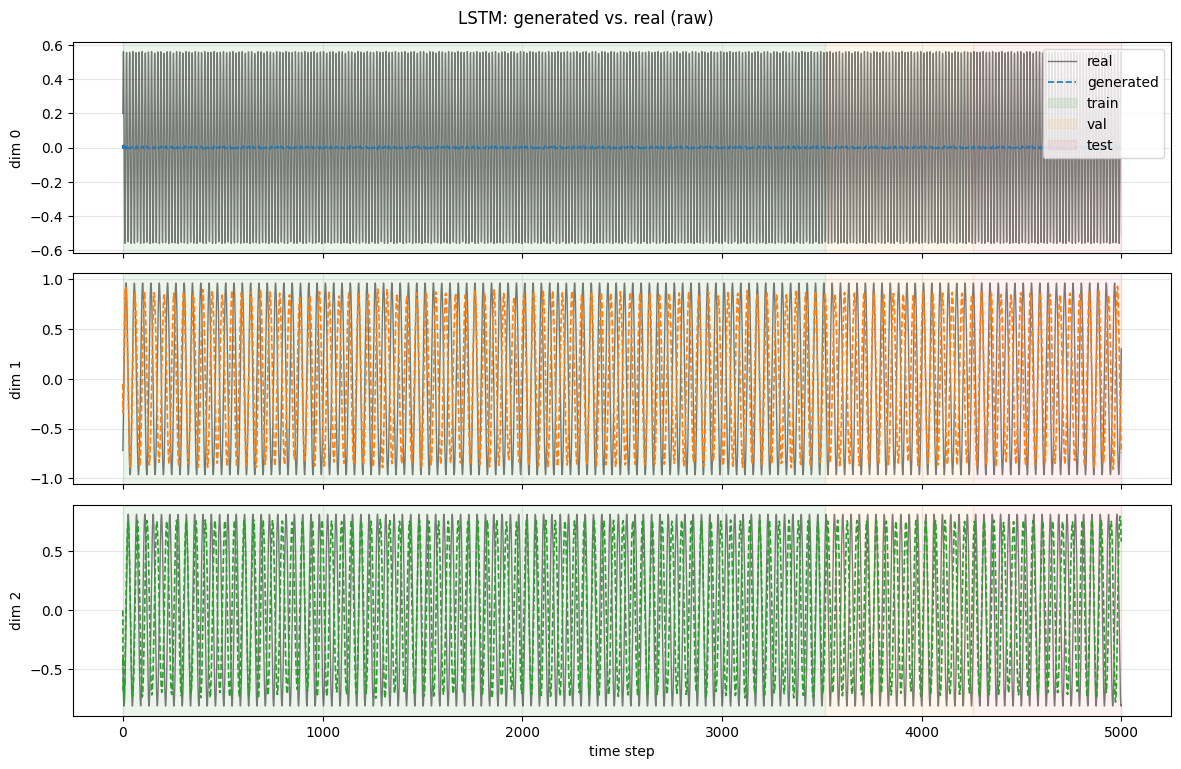

In [ ]:
# Prepare a warm seed for the first window: use the first W-1 real raw steps
seed_first = torch.from_numpy(DATA['series'][:WINDOW_SIZE-1]).float().to(device)

# TODO: Generate sequences for each model
generated = {}
with torch.no_grad():
    for name, m in [("RNN", rnn_model), ("LSTM", lstm_model), ("GRU", gru_model), ("Transformer", tr_model)]:
        continue

# Compute boundaries in time steps for train/val/test in the full sequence for shading
N_win = DATA['windows'].shape[0]
idx_train = int(0.7 * N_win)
idx_val = int(0.85 * N_win)
# Convert window-index boundaries to time-step boundaries approximately
# Training windows cover from 0 to start_indices[idx_train] + WINDOW_SIZE
train_end_t = int(DATA['start_indices'][idx_train] + WINDOW_SIZE)
val_end_t = int(DATA['start_indices'][idx_val] + WINDOW_SIZE)
train_end_t = min(train_end_t, T)
val_end_t = min(val_end_t, T)

# For each model, show per-dimension plots with train/val/test shading
for name, gen in generated.items():
    real = DATA['series']
    fig, axes = plt.subplots(D, 1, figsize=(12, 2.6*D), sharex=True)
    fig.suptitle(f"{name}: generated vs. real")

    if D == 1:
        axes = [axes]

    for d in range(D):
        ax = axes[d]
        ax.plot(real[:, d], color='k', alpha=0.5, linewidth=1.0, label='real')
        ax.plot(gen[:, d], color=f"C{d}", linestyle='--', linewidth=1.2, label='generated')
        # Shade regions
        ax.axvspan(0, train_end_t, color='green', alpha=0.08, label='train' if d==0 else None)
        ax.axvspan(train_end_t, val_end_t, color='orange', alpha=0.08, label='val' if d==0 else None)
        ax.axvspan(val_end_t, T, color='red', alpha=0.05, label='test' if d==0 else None)
        ax.set_ylabel(f"dim {d}")
        ax.grid(alpha=0.3)

    axes[-1].set_xlabel("time step")
    axes[0].legend(loc='upper right')
    plt.tight_layout()
    plt.show()